In [1]:
!pip install geopandas
!pip install geoplot
!pip uninstall rtree
!apt install libspatialindex-dev
!pip3 install rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: Rtree 1.0.1
Uninstalling Rtree-1.0.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/Rtree-1.0.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/Rtree.libs/libspatialindex-91fc2909.so.6.1.1
    /usr/local/lib/python3.9/dist-packages/rtree/*
Proceed (Y/n)? y
  Successfully uninstalled Rtree-1.0.1
y
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.9.3-1build1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Rtree-1.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)


In [2]:
!wget https://github.com/kenchen10/heightmap/raw/main/202007-divvy-tripdata.zip

--2023-03-29 12:44:46--  https://github.com/kenchen10/heightmap/raw/main/202007-divvy-tripdata.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kenchen10/heightmap/main/202007-divvy-tripdata.zip [following]
--2023-03-29 12:44:46--  https://raw.githubusercontent.com/kenchen10/heightmap/main/202007-divvy-tripdata.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23621786 (23M) [application/zip]
Saving to: ‘202007-divvy-tripdata.zip.1’

202007-divvy-tripda 100%[===================>]  22.53M  --.-KB/s    in 0.1s    

2023-03-29 12:44:46 (189 MB/s) - ‘202007-divvy-tripdata.zip.1’ saved [23621786

In [3]:
!unzip /content/202007-divvy-tripdata.zip

Archive:  /content/202007-divvy-tripdata.zip
replace 202007-divvy-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 202007-divvy-tripdata.csv  y

replace __MACOSX/._202007-divvy-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: __MACOSX/._202007-divvy-tripdata.csv  


In [4]:
import pandas as pd
import geopandas
import geoplot
import matplotlib.pyplot as plt

In [5]:
city = geopandas.read_file('https://raw.githubusercontent.com/kenchen10/heightmap/main/communities.geojson')
stations = pd.read_csv('https://raw.githubusercontent.com/kenchen10/heightmap/main/station-locations.csv')
trips = pd.read_csv('/content/202007-divvy-tripdata.csv')

In [6]:
#Load in the bike trip csv with pandas. Get rid of missing (nan) start and end station ids,
trips.dropna(subset=['start_station_id', 'end_station_id'], inplace=True)
trips

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551475,C6DF8D53DF18817E,docked_bike,2020-07-12 13:07:03,2020-07-12 13:24:45,Broadway & Barry Ave,300.0,Lake Shore Dr & North Blvd,268.0,41.937582,-87.644097,41.911722,-87.626804,casual
551476,972AFD72E2CAFAC6,docked_bike,2020-07-08 22:20:07,2020-07-08 23:44:20,Michigan Ave & Jackson Blvd,284.0,Michigan Ave & Jackson Blvd,284.0,41.877850,-87.624080,41.877850,-87.624080,casual
551477,D78F2AD0592D884F,docked_bike,2020-07-18 21:52:00,2020-07-18 22:09:41,Lincoln Ave & Belle Plaine Ave,298.0,Halsted St & Wrightwood Ave,349.0,41.956003,-87.680161,41.929143,-87.649077,casual
551478,7CE0C2DB6D70727D,docked_bike,2020-07-20 17:32:52,2020-07-20 18:00:42,Evanston Civic Center,661.0,Evanston Civic Center,661.0,42.057044,-87.686554,42.057044,-87.686554,casual


In [7]:
# convert those columns to ints.
trips['start_station_id'] = trips['start_station_id'].astype(int)
trips['end_station_id'] = trips['end_station_id'].astype(int)

In [8]:
#Load the community areas GEOJSON with geopandas. 
#Rename the column ‘area_numbe’ to ‘area_number’, and convert it to an int.
city.rename(columns={'area_numbe': 'area_number'}, inplace=True)
city['area_number'] = city['area_number'].astype(int)
city

,community,area,shape_area,perimeter,area_num_1,area_number,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,0,75584290.0209,0,74,74,0,0,48665.1305392,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,0,91877340.6988,0,75,75,0,0,46396.419362,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,OHARE,0,371835607.687,0,76,76,0,0,173625.98466,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,EDGEWATER,0,48449990.8397,0,77,77,0,0,31004.8309456,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


In [9]:
#Load in the stations csv with pandas, convert it to a GeoDataFrame
#set its geometry to the point specified by the longitude and latitude pair.
stations = geopandas.GeoDataFrame(stations, geometry=geopandas.points_from_xy(stations.lon, stations.lat))

# Set the CRS to WGS 84
stations.crs = 'EPSG:4326'
stations

,has_kiosk,lat,lon,external_id,rental_uris,short_name,rental_methods,electric_bike_surcharge_waiver,eightd_station_services,name,...,station_type,eightd_has_key_dispenser,legacy_id,region_id,region_code,address,rack_model,dockless_bikes_parking_zone_capacity,client_station_id,geometry
0,True,41.876511,-87.620548,a3a36d9e-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15541,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Buckingham Fountain,...,classic,False,2,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.62055 41.87651)
1,True,41.867226,-87.615355,a3a37378-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15544,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Shedd Aquarium,...,classic,False,3,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.61536 41.86723)
2,True,41.856268,-87.613348,a3a378ca-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15545,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Burnham Harbor,...,classic,False,4,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.61335 41.85627)
3,True,41.874053,-87.627716,a3a37e26-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",SL-007,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],State St & Harrison St,...,classic,False,5,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.62772 41.87405)
4,True,41.886976,-87.612813,a3a38363-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",KA1503000064,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Dusable Harbor,...,classic,False,6,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.61281 41.88698)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,False,41.705846,-87.717074,motivate_CHI_1448642179437434482,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",NaN,NaN,False,[],W 103rd St & S Avers Ave,...,lightweight,False,1448642179437434482,NaN,CHI,"Graham School of Management, South Avers Avenu...",CITY_PILOT_RACK,10.0,motivate_CHI_1448642179437434482,POINT (-87.71707 41.70585)
687,False,41.705588,-87.602938,motivate_CHI_1448642183732401788,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",NaN,NaN,False,[],Maryland Ave & 104th St,...,lightweight,False,1448642183732401788,NaN,CHI,"Pullman Wheel Works, 833-901, East 104th Stree...",CITY_PILOT_RACK,10.0,motivate_CHI_1448642183732401788,POINT (-87.60294 41.70559)
688,False,41.688117,-87.536550,motivate_CHI_1448642175142467184,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",NaN,NaN,False,[],Avenue L & 114th St,...,lightweight,False,1448642175142467184,NaN,CHI,"George Washington High School, South Avenue L,...",CITY_PILOT_RACK,10.0,motivate_CHI_1448642175142467184,POINT (-87.53655 41.68812)
689,False,41.935581,-87.644042,motivate_CHI_1436495100903691938,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",NaN,NaN,False,[],W Oakdale Ave & N Broadway,...,lightweight,False,1436495100903691938,NaN,CHI,"2919-2935, North Broadway, Lincoln Park, Lake ...",CITY_PILOT_RACK,6.0,motivate_CHI_1436495100903691938,POINT (-87.64404 41.93558)


In [10]:
#Spatial Join
joined = geopandas.sjoin(stations, city, op='within',how='left')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [11]:
joined 

,has_kiosk,lat,lon,external_id,rental_uris,short_name,rental_methods,electric_bike_surcharge_waiver,eightd_station_services,name,...,index_right,community,area,shape_area,perimeter,area_num_1,area_number,comarea_id,comarea,shape_len
0,True,41.876511,-87.620548,a3a36d9e-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15541,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Buckingham Fountain,...,37.0,LOOP,0,46335565.4586,0,32,32.0,0,0,39428.6729962
1,True,41.867226,-87.615355,a3a37378-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15544,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Shedd Aquarium,...,33.0,NEAR SOUTH SIDE,0,49769639.4541,0,33,33.0,0,0,45053.1651038
2,True,41.856268,-87.613348,a3a378ca-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15545,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Burnham Harbor,...,33.0,NEAR SOUTH SIDE,0,49769639.4541,0,33,33.0,0,0,45053.1651038
3,True,41.874053,-87.627716,a3a37e26-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",SL-007,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],State St & Harrison St,...,37.0,LOOP,0,46335565.4586,0,32,32.0,0,0,39428.6729962
4,True,41.886976,-87.612813,a3a38363-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",KA1503000064,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Dusable Harbor,...,37.0,LOOP,0,46335565.4586,0,32,32.0,0,0,39428.6729962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,False,41.705846,-87.717074,motivate_CHI_1448642179437434482,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",NaN,NaN,False,[],W 103rd St & S Avers Ave,...,72.0,MOUNT GREENWOOD,0,75584290.0209,0,74,74.0,0,0,48665.1305392
687,False,41.705588,-87.602938,motivate_CHI_1448642183732401788,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",NaN,NaN,False,[],Maryland Ave & 104th St,...,48.0,PULLMAN,0,59001555.602,0,50,50.0,0,0,35572.0695077
688,False,41.688117,-87.536550,motivate_CHI_1448642175142467184,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",NaN,NaN,False,[],Avenue L & 114th St,...,50.0,EAST SIDE,0,83241728.0493,0,52,52.0,0,0,52274.1928493
689,False,41.935581,-87.644042,motivate_CHI_1436495100903691938,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",NaN,NaN,False,[],W Oakdale Ave & N Broadway,...,44.0,LAKE VIEW,0,87214799.2728,0,6,6.0,0,0,51973.0968677


In [12]:
trips = trips.merge(joined [['station_id', 'area_number']], left_on='start_station_id', right_on='station_id', how='left')
trips = trips.rename(columns={'area_number': 'start_ca_num'}).drop(columns=['station_id'])
trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_ca_num
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.906866,-87.626217,41.906724,-87.634830,member,8.0
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.943670,-87.648950,41.984045,-87.660274,member,6.0
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.932588,-87.636427,41.936497,-87.647539,casual,7.0
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.890762,-87.631697,41.918306,-87.636282,casual,8.0
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.911722,-87.626804,41.907993,-87.631501,member,7.0


In [13]:
trips = trips.merge(joined[['station_id', 'area_number']], left_on='end_station_id', right_on='station_id', how='left')
trips = trips.rename(columns={'area_number': 'end_ca_num'}).drop(columns=['station_id'])
trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_ca_num,end_ca_num
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.906866,-87.626217,41.906724,-87.634830,member,8.0,8.0
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.943670,-87.648950,41.984045,-87.660274,member,6.0,77.0
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.932588,-87.636427,41.936497,-87.647539,casual,7.0,6.0
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.890762,-87.631697,41.918306,-87.636282,casual,8.0,7.0
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.911722,-87.626804,41.907993,-87.631501,member,7.0,8.0


In [14]:
#Visualize Station Distribution (6 points)
stations_by_area = joined.groupby('area_number').size().reset_index(name='num_stations')
city_joined=city.merge(stations_by_area, on='area_number')
city_joined

,community,area,shape_area,perimeter,area_num_1,area_number,comarea_id,comarea,shape_len,geometry,num_stations
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",11
1,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",3
2,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",8
3,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",6
4,LINCOLN SQUARE,0,71352328.2399,0,4,4,0,0,36624.6030848,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ...",14
5,WASHINGTON PARK,0,42373881.4842,0,40,40,0,0,28175.3160866,"MULTIPOLYGON (((-87.60604 41.78587, -87.60627 ...",4
6,HYDE PARK,0,45105380.1732,0,41,41,0,0,29746.7082016,"MULTIPOLYGON (((-87.58038 41.80253, -87.58040 ...",12
7,WOODLAWN,0,57815179.512,0,42,42,0,0,46936.9592443,"MULTIPOLYGON (((-87.57714 41.78615, -87.57714 ...",11
8,ROGERS PARK,0,51259902.4506,0,1,1,0,0,34052.3975757,"MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ...",17
9,NORTH PARK,0,70288706.4343,0,13,13,0,0,41581.9486539,"MULTIPOLYGON (((-87.70690 41.98308, -87.70688 ...",3


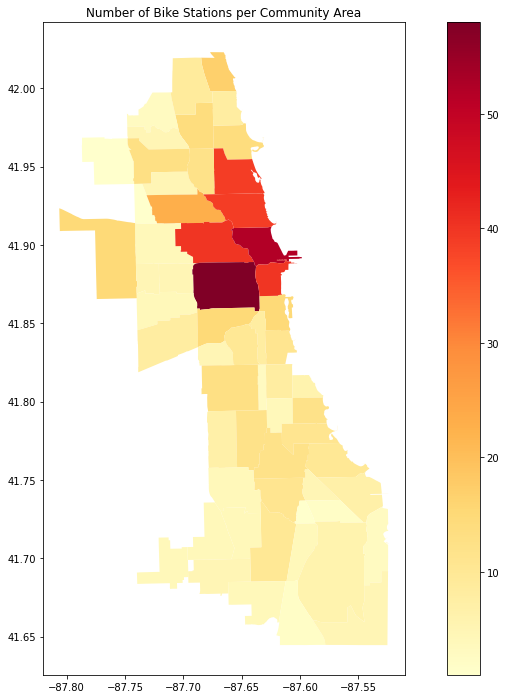

In [15]:
# Create the map
fig, ax = plt.subplots(figsize=(15,12))
city_joined.plot(column='num_stations', cmap='YlOrRd', ax=ax, legend=True)
ax.set_title('Number of Bike Stations per Community Area')
plt.show()